## Kapittel 1. Innledning 

Turistskatt er aktuelt for tiden og i en pressemelding skriver regjeringen at de vil gi kommuner muligheten til å innføre et besøksbidrag. Regjeringen jobber med å sette i gang pilotprosjekter (Regjeringen, 2023). I forbindelse med skatten har næringsminister Jon Christian Vestre besøkt Lofoten som tiltrekker seg mye turister. Formålet med avgiften er å senke trykket av turister, og samtidig gjøre næringen mer bærekraftig og helårlig.

Populære turistattraksjoner slik som Nordkapp, Beitostølen og Lofoten er alle opp til vurdering for besøksbidrag. Per nå har ingen av destinasjonene innført besøksbidrag. 

#### Hvorfor turistskatt?

Pris er veldig viktig i samfunnsøkonomi og kan være med å påvirke de beslutningene konsumenter tar når de bestemmer hva de skal kjøpe eller konsumere av ulike goder (Andreassen et al., 2021, s. 34.) Stortinget kan indirekte igjennom avgifter eller skatter være med å påvirke de beslutningene som konsumenter tar. Gjennom avgifter kan for eksempel en CO2 avgift på produksjon av sement, eller en CO2 avgift på bruk av bensin og diesel være med å påvirke beslutninger til de ulike aktøren, og dermed ved hjelp av avgiften kutte det totale utslippet av CO2. På lik linje som en avgift med hensikt å begrense CO2 utslitt kan stortinget innføre en turistskatt på reiselivet. Vi kan bruke konkrete eksempler her også: et besøksbidrag vil skape inntekter til staten, disse inntektene kan brukes til å forbedre goder som er tilknyttet reiselivet. Det kan bety bedre tilretteleggelse av aktiviteter, noe som igjen kan bidra til at næringen blir mer helårlig. Et besøksbidrag kan altså hjelpe med å stimulere økonomien i reiselivet. 

Turistattraksjoner slik som Lofoten har flere fellesgoder som ikke tilfaller den enkelte næringsaktør, men som er av betydning for reisemålets attraksjons verdi. Tilrettelegging av ulike aktiviteter, informasjon, opplevelser og miljøet på reisemålet er alle viktige faktorer som påvirker opplevelsen av et reisemål, og det er ikke bare næringsaktørene i de ulike turistattraksjonene som bidrar til den totale opplevelsen. Staten, fylkeskommuner, kommuner, frivillighet og næringslivet bidrar alle i ulik grad og på forskjellige måter til å finansiere goder som er tilknyttet reiselivet (regjeringen, 2023). Disse godene har en betydning for næringsaktørenes kundegrunnlag og omsetning. Fellesgodene kan ved hjelp av turistskatt eller et besøksbidrag finansieres, og dette kan bidra til videre utvikling av fellesgodene.

Reiselivet har nettopp vært igjennom en tøff pandemi, og en slik avgift vil kunne stimulere økonomien. Man kan dog også argumentere for at en avgift vil ha motsatt effekt. Økte avgifter fører til økte priser og mindre etterspørsel, og kan på lang sikt være uønsket. Slike økonomiske årsak-virkning sammenhenger kan være vanskelige å oppdage, og blir viktige når det arbeides med samfunnsøkonomisk virkinger av offentlige inngrep i markedet. 


## Kapittel 2. Turisnæringen i Norge.

Turisme er et økonomisk, sosialt og kulturelt fenomen. Turisme blir ifølge The United Nations World Tourism Organization (UNTWO) definert som aktiviteten å reise til steder som er utenfor den vanlige fritidssfæren (J. Clark et al., 2020, s. 155.). Norge og spesielt Nord-Norge har flere arktiske aspekter deriblant urørt natur, nordlys og midnattssol. Det arktiske klimaet og naturen rundt blir hyppig brukt som turterreng både på sommer og vinter. Disse godene har naturligvis en verdi for både reiselivet og Norge som turistattraksjon. 

Ved økt turisme er det viktig at man balanserer økonomisk vekst med å ivareta natur og kultur. Derfor bør reiselivet utnytte ressurser på best mulig måte. 
I lys av dette har UNTWO arbeidet for å promotere utvikling i bærekraftig turisme. Turisme skal i henhold til «2030 Agenda for Sustainable Development Goals» ivareta det økologiske, opprettholde det kulturelle, og respektere de sosial kulturelle verdiene (J. Clark, et al., 2020, s. 157). Turisme skal selvfølgelig også skape inntekter, og disse inntektene bør gagne lokal samfunnet i form av sosiale tjenester eller lignende. Miljømessige tiltak er også viktig, særlig i arktiske strøk med mye urørt natur og en sårbar urbefolkning. 

Turisme er viktig økonomisk, både fordi det skaper arbeidsplasser og fordi det skaper inntekter. Det er flere næringer som livnærer seg på turisme, blant annet: 
-	Overnattingstjenester består av hoteller, campingplasser, privat utleie og annen overnatting. De store hotellkjedene dominerer overnattingsbransjen i Norge. 
-	serveringstjenester består av restauranter, kafeer, catering barer og puber. 
-	transporttjenester omfatter bedrifter som frakter passasjerer med fly, ferger, jernbane og buss. Disse bedriftene er ofte ikke lokalisert der kundene er. Det er få bedrifter, men store. Som for eksempel Norwegian, SAS, Hurtigruten og Fjord1. 
-	reisebyrå og reisearrangørtjenester som reiseguider og ledere eller større aktører som byråer. Disse er ofte sentralisert, men salgsstedene befinner seg der kundene er. 

(Jakobsen et al., 2021, s. 4). 

Disse næringene er sesongbaserte, noe som er et problem for sysselsettingen. Det er derfor viktig å sette søkelys på løsninger som kan sikre årlig drift, og langsiktige inntekter til næringen. Turistnæringen har også nettopp vært igjennom en tøff pandemi, noe som har resultert i permitteringer og tap av inntjening. 

In [88]:
import json
import pandas as pd
import requests
from pyjstat import pyjstat

postUrl = "https://data.ssb.no/api/v0/no/table/10604/"

apiQuery = {
  "query": [
    {
      "code": "Reiseliv",
      "selection": {
        "filter": "item",
        "values": [
          "OTV",
          "SEV",
          "TRJ",
          "TRBSD",
          "TRSF",
          "TRF",
          "RBAV"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2018"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}
def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds

df, df_id, ds = apiToDataframe(postUrl, apiQuery)

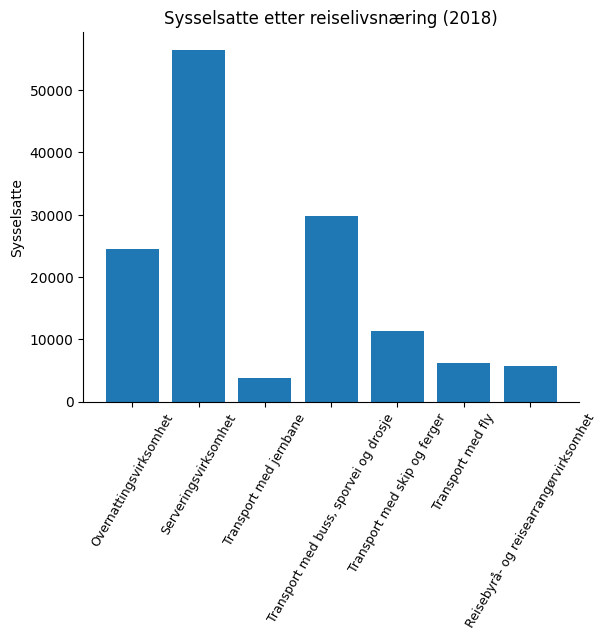

In [148]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.bar(df['reiselivsnæring'],df['value']*1000)
ax.set_ylabel('Sysselsatte')
ax.set_title('Sysselsatte etter reiselivsnæring (2018)')
ax.xaxis.set_tick_params(labelsize=9, rotation = 60)


## Kapittel 3 Samfunnsøkonomiske effekter av en turistskatt

#### Kildeliste

Andreassen, Viggo., Bredesen, Ivar., Thøgersen, Joachim. (2021). Innføring i Mikroøkonomi. For økonomisk-administrative stuider (3.utg). Cappelen Damm. 

Derek j. Clark., Moilanen, Mikko., Østbye, Stein (2020). Tourism in the Arctic I The economy of the North. ECONOR (SSB). 
https://www.ssb.no/en/natur-og-miljo/artikler-og-publikasjoner/_attachment/454081?_ts=17bc94cfc98

Regjeringen. (2023, 19. Januar). Vurderer destinasjoner for besøksbidrag.
https://www.regjeringen.no/no/aktuelt/vurderer-destinasjoner-for-besoksbidrag/id2959885/?expand=factbox2959954

Jakobsen, Erik., K. Iversen, Endre., Nedrum, live Rødal, Mathie (2021). Reiselivet før, under og etter pandemien. Menon Economis (NHO rapport).   
https://www.nhoreiseliv.no/contentassets/6abc6856aad442bcb91b431d978d6042/rapport-norsk-reiseliv-for-under-og-etter-pandemien.pdf

